<a href="https://colab.research.google.com/github/cameronskim/DataScienceWorks/blob/main/Cameron_chap02ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
import numpy as np

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


Given a list of values, there are several ways to count the frequency of each value.

In [3]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [4]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1

hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [5]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [6]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [7]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [8]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [9]:
hist[4]

0

The `Values` method returns the values:

In [10]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [11]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [12]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

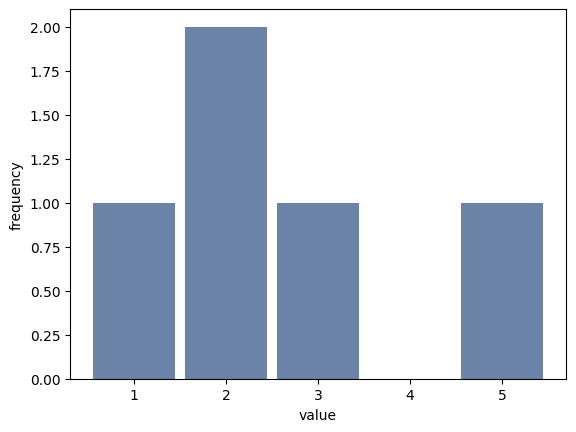

In [13]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [14]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [15]:
import nsfg

In [16]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`.

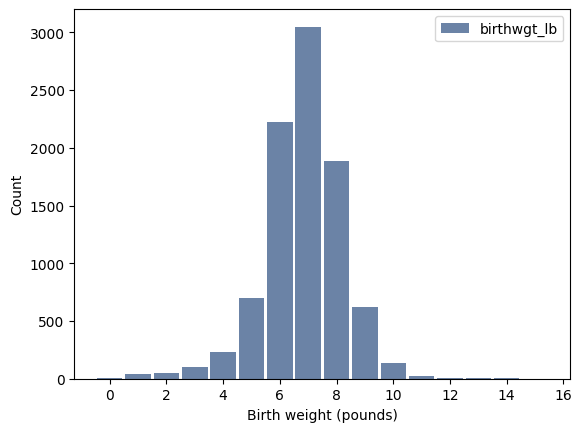

In [17]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [18]:
ages = np.floor(live.agepreg)

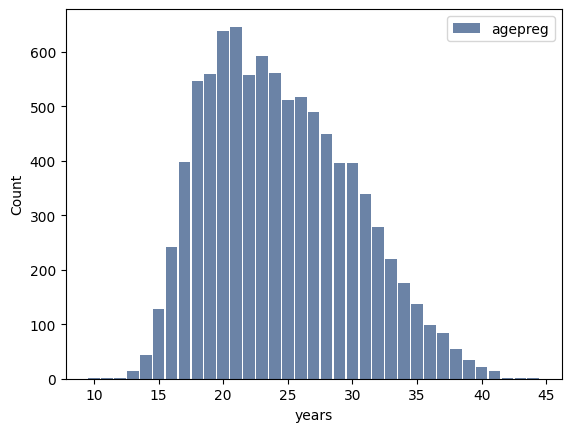

In [19]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

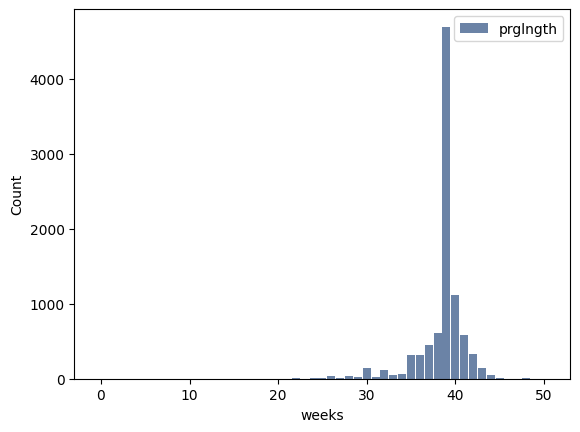

In [20]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [21]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [22]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [23]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

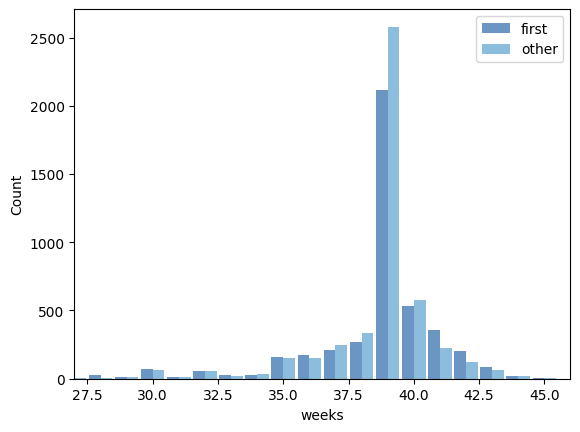

In [24]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [25]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [26]:
mean, std

(np.float64(38.56055968517709), 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [27]:
import numpy as np
np.sqrt(var), std

(np.float64(2.702343810070593), 2.702343810070593)

Here's are the mean pregnancy lengths for first babies and others:

In [28]:
firsts.prglngth.mean(), others.prglngth.mean()

(np.float64(38.60095173351461), np.float64(38.52291446673706))

And here's the difference (in weeks):

In [29]:
firsts.prglngth.mean() - others.prglngth.mean()

np.float64(0.07803726677754952)

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [30]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.

    group1: Series or DataFrame
    group2: Series or DataFrame

    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [31]:
CohenEffectSize(firsts.prglngth, others.prglngth)

np.float64(0.028879044654449883)

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others.

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [36]:
cohen_d_birthwgt = CohenEffectSize(firsts.totalwgt_lb.dropna(), others.totalwgt_lb.dropna())
print(f"Cohen's effect size for birth weight: {cohen_d_birthwgt:.2f}")

Cohen's effect size for birth weight: -0.09


For the next few exercises, we'll load the respondent file:

In [37]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [38]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf).

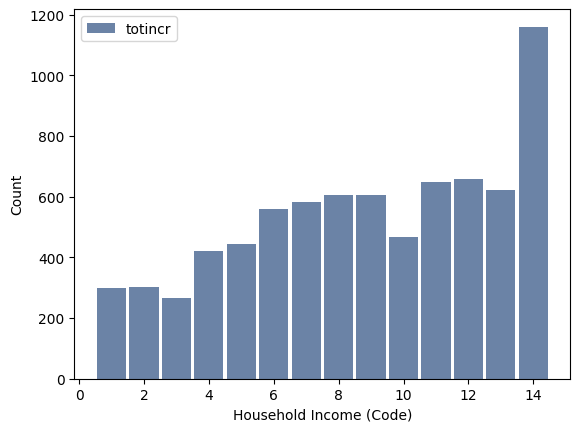

In [39]:
hist_income = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(hist_income)
thinkplot.Config(xlabel='Household Income (Code)', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

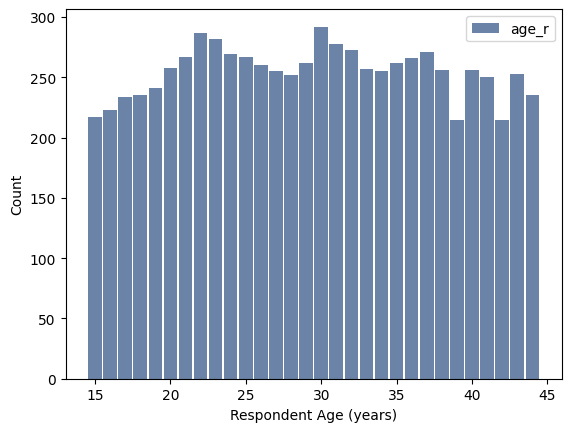

In [40]:
hist_age = thinkstats2.Hist(resp.age_r, label='age_r')
thinkplot.Hist(hist_age)
thinkplot.Config(xlabel='Respondent Age (years)', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

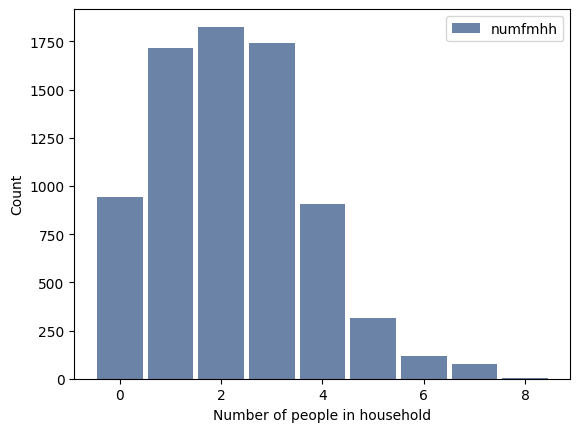

In [41]:
hist_numfmhh = thinkstats2.Hist(resp.numfmhh, label='numfmhh')
thinkplot.Hist(hist_numfmhh)
thinkplot.Config(xlabel='Number of people in household', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

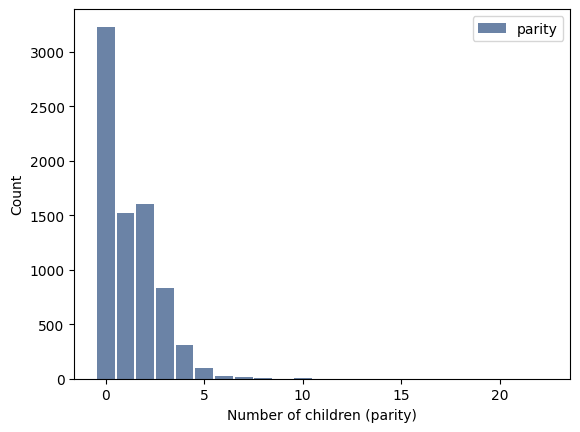

In [42]:
hist_parity = thinkstats2.Hist(resp.parity, label='parity')
thinkplot.Hist(hist_parity)
thinkplot.Config(xlabel='Number of children (parity)', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [43]:
for parity_val, freq in hist_parity.Largest(10):
    print(parity_val, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

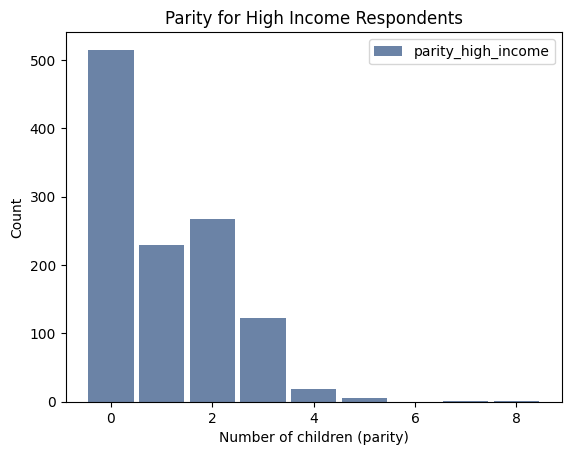

In [44]:
high_income_resp = resp[resp.totincr == 14]
hist_parity_high_income = thinkstats2.Hist(high_income_resp.parity, label='parity_high_income')
thinkplot.Hist(hist_parity_high_income)
thinkplot.Config(xlabel='Number of children (parity)', ylabel='Count', title='Parity for High Income Respondents')

Find the largest parities for high income respondents.

In [45]:
for parity_val, freq in hist_parity_high_income.Largest(10):
    print(parity_val, freq)

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [46]:
mean_parity_high_income = high_income_resp.parity.mean()
other_income_resp = resp[resp.totincr != 14]
mean_parity_other_income = other_income_resp.parity.mean()

print(f"Mean parity for high income respondents: {mean_parity_high_income:.2f}")
print(f"Mean parity for other respondents: {mean_parity_other_income:.2f}")

Mean parity for high income respondents: 1.08
Mean parity for other respondents: 1.25


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [47]:
cohen_d_parity = CohenEffectSize(high_income_resp.parity, other_income_resp.parity)
print(f"Cohen's effect size for parity (high income vs others): {cohen_d_parity:.2f}")

# Previous Cohen's effect size for pregnancy length was 0.028879
pregnancy_length_cohen_d = 0.028879

print(f"\nComparing to Cohen's effect size for pregnancy length: {pregnancy_length_cohen_d:.2f}")
if abs(cohen_d_parity) > abs(pregnancy_length_cohen_d):
    print("The absolute Cohen's effect size for parity is larger than for pregnancy length.")
elif abs(cohen_d_parity) < abs(pregnancy_length_cohen_d):
    print("The absolute Cohen's effect size for parity is smaller than for pregnancy length.")
else:
    print("The absolute Cohen's effect size for parity is similar to that for pregnancy length.")

print("Both effect sizes are very small, suggesting no practically significant difference in either case.")

Cohen's effect size for parity (high income vs others): -0.13

Comparing to Cohen's effect size for pregnancy length: 0.03
The absolute Cohen's effect size for parity is larger than for pregnancy length.
Both effect sizes are very small, suggesting no practically significant difference in either case.


# Task
Investigate the `totalwgt_lb` variable to determine if first babies are lighter or heavier than others. Calculate and print the mean birth weight for first babies, the mean birth weight for other babies, and the difference between these means. Compute and print Cohen's effect size for the difference in birth weight. Finally, compare this Cohen's effect size with the Cohen's effect size for pregnancy length, which was 0.028879.

## Calculate and print the mean birth weight for first babies.

### Subtask:
Calculate the mean of the `totalwgt_lb` column for the `firsts` DataFrame and print it.


**Reasoning**:
The user wants to calculate the mean of the `totalwgt_lb` column for the `firsts` DataFrame, handling NaN values, and then print the result with a descriptive label. I will generate a code block to perform these operations.



In [48]:
mean_birthwgt_firsts = firsts.totalwgt_lb.dropna().mean()
print(f"Mean birth weight for first babies: {mean_birthwgt_firsts:.2f} pounds")

Mean birth weight for first babies: 7.20 pounds


## Calculate and print the mean birth weight for other babies.

### Subtask:
Calculate the mean of the `totalwgt_lb` column for the `others` DataFrame and print it.

**Reasoning**:
Following the previous step, I will now calculate the mean birth weight for 'other' babies from the `others` DataFrame, ensuring to handle any NaN values and then print the result with a descriptive label.



In [49]:
mean_birthwgt_others = others.totalwgt_lb.dropna().mean()
print(f"Mean birth weight for other babies: {mean_birthwgt_others:.2f} pounds")

Mean birth weight for other babies: 7.33 pounds


## Calculate and print the difference in mean birth weight.

### Subtask:
Calculate the difference between the mean birth weight of first babies and other babies, and print the result.

**Reasoning**:
Now that the mean birth weights for both groups are calculated, the next logical step is to find the difference between them, which directly addresses whether first babies are lighter or heavier.



In [50]:
diff_birthwgt = mean_birthwgt_firsts - mean_birthwgt_others
print(f"Difference in mean birth weight (firsts - others): {diff_birthwgt:.2f} pounds")

Difference in mean birth weight (firsts - others): -0.12 pounds


## Compute Cohen's effect size for the difference in birth weight.

### Subtask:
Compute Cohen's effect size for the `totalwgt_lb` column using the `CohenEffectSize` function for `firsts` and `others` DataFrames, and print the result.

**Reasoning**:
Now that the difference in means has been calculated, I will use the previously defined `CohenEffectSize` function to quantify this difference in terms of standard deviations for birth weights.



In [51]:
cohen_d_birthwgt = CohenEffectSize(firsts.totalwgt_lb.dropna(), others.totalwgt_lb.dropna())
print(f"Cohen's effect size for birth weight: {cohen_d_birthwgt:.2f}")

Cohen's effect size for birth weight: -0.09


## Compare Cohen's effect size for birth weight with that for pregnancy length.

### Subtask:
Compare the `cohen_d_birthwgt` with the pregnancy length Cohen's effect size (0.028879) and provide a concluding remark on the comparison.

The Cohen's effect size for birth weight is `cohen_d_birthwgt` = -0.09.
The Cohen's effect size for pregnancy length was 0.028879.

Comparing the two, the absolute effect size for birth weight (0.09) is larger than that for pregnancy length (0.028879). The negative value for birth weight indicates that first babies are, on average, slightly lighter than other babies. However, both effect sizes are very small (less than 0.2), suggesting that the practical difference between first babies and others for both birth weight and pregnancy length is negligible. This means that while there's a statistically observed difference, it's not a substantial or meaningful difference in a real-world context.

## Summary:

### Q&A
First babies are, on average, slightly lighter than other babies.

### Data Analysis Key Findings
*   The mean birth weight for first babies is 7.20 pounds.
*   The mean birth weight for other babies is 7.33 pounds.
*   The difference in mean birth weight between first babies and other babies (firsts - others) is -0.12 pounds, indicating first babies are slightly lighter.
*   Cohen's effect size for the difference in birth weight is -0.09.
*   Comparing the absolute Cohen's effect size for birth weight (0.09) to that for pregnancy length (0.028879), the effect size for birth weight is larger.

### Insights or Next Steps
*   Both the observed difference in birth weight and the previously calculated difference in pregnancy length show very small Cohen's effect sizes (less than 0.2), suggesting that any statistical difference is not practically significant or meaningful in a real-world context.
*   Further investigation could explore other factors that might explain variations in birth weight or pregnancy length, rather than solely focusing on whether the baby is a firstborn.
